#**Курсова робота**

# ***на тему:***

# **Метод випадковго пошуку зі зменшенням інтервалу**

# **Виконала: студенка групи КМ-83 Лісова Ю.О.**

# **Керівник: Норкін Б.В.**

## **Зміст**

*   **Вступ**
*   **Постановка завдання**
*   **Опис алгоритму методу**
*   **Розробка програмного забезпечення**
  * Імпортування бібліотек
  * Функції для візуалізації результатів.
 * Безумовна оптимізація
      * Функції для реалізації алгоритму.
      * Підбір оптимальних параметрів для заданої функції (кількість серій, кількість точок в серії, розмір інтервалу тощо).
  * Умовна оптимізація
      * Функції для методів одновимірного пошуку.
      * Демонстарція роботи алгоритму в опуклій області (всередині та поза нею).
      * Демонстарція роботи алгоритму у неопуклій та лінійній областях.
*   **Висновки**
*   **Список літератури**



## **Вступ**

Дана робота присвячена методу випадкового пошуку зі зменшенням інтервалу. Цей метод є модифікацією методу прямої вибірки. Він базується на виборі випадкового вектора з рівномірного розподілу.

Алгоритм має свої переваги та недоліки. 
Головним недоліком методу випадкового пошуку зі зменшенням інтервалу (і загалом методів випадкового пошуку) є те, що його збіжінсть недоведена. Але для кожної конкретної задачі можна підібрати параметри.

Серед переваг можна виділити простоту.

## **Постановка задачі**

Дослідити збіжність методу випадкового пошуку зі зменшенням інтервалу пошуку при мінімізації кореневої функції в залежності від параметрів методу(кількість точок, серій, розміри інтервала та інші).

Використати метод випадкового пошуку зі зменшенням інтервалу пошуку в якості метода спуску для умовної оптимізації в залежності від:

1. Розташування локального мінімума (всередині / поза допустимою областю).
2. Виду допустимої області (випукла / невипукла / з лінійними обмеженнями).


## **Алгоритм методу**


Нехай дано початковий допустимий розв'язок $x_0$, розмір початкового інтервалу $z^0$ і параметр $\epsilon$, який визначає зменшення інтервалу ($0<\epsilon<1)$. Для кожної із серій $Q$, починаючи із $q=1$ потрібно виконати наступні дії:
1.   Для $i = 1,...,N$ обчислити $x_i^p=x_i^{q-1}+rz_i^{q-1}$, де $r$ - випадкова величина, яка рівномірно розділена на інтервалі ($-\frac{1}{2}$, $\frac{1}{2}$).
2.   Якщо $x^p$ - недопустима точка і $p<P$, то потрібно повернутися до кроку 1.Якщо $x^p$ - допустима точка, потрібно запам'ятати $x^p$ та $f(x^p)$, і в тому випадку, коли $p<P$, повторити крок 1. Якщо ж $p=P$, то треба серед усіх допустимих точок $x^p$ знайти таку, яка має найменше значення функції $f(x^p)$ і прирівняти її до $x^q$.
3. Зменшити інтервал, використовуючи формулу $z_i^q=(1-\epsilon)z_i^{q-1}$.
4. Якщо $q>Q$, то закінчуємо обчислення. В іншому випадку збільшуємо $q$ і продовжуємо обчислення, повернувшись до кроку 1.



## **Розробка програмного забезпечення**

### **Імпортування бібліотек.**

In [101]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge   

### **Функції для візуалізації результатів.**

In [2]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
f = lambda x, y: (10*(x - y)**2 + (x - 1)**2)**(1/4)

In [95]:
# limitations
# minima in limitations
# convex region
limitations_in = lambda x, y: np.square(x - 0.5) + np.square(y - 1)
limitation_in_bool = lambda x, y: limitations_in(x, y) <= 4.5 * 4.5

# minima outside limitations
limitation_out = lambda x, y: np.square(x + 1) + np.square(y)
limitation_out_bool = lambda x, y: limitation_out(x, y) <= 1.1 * 1.1

# linear region
region_linear = lambda x, y: x + y - 2
region_linear_fill = lambda x: 2 - x
region_linear_bool = lambda x, y: region_linear(x, y) <= 0

# non-convex region
region_non_convex_1 = lambda x: np.sqrt(9 - x * x)
region_non_convex_2 = lambda x: np.sqrt(1 - x * x)
#region_non_convex = lambda x, y: x * x + y * y
region_non_convex_bool = lambda x, y: 1 <= x * x + y * y <= 3

Функція для побудови тривимірного графіка функції.

In [4]:
# 3d graph with or without trajectory
def plot_3d_graph(x, y, f, graph_title, history = []):
    fig = plt.figure(figsize = (12, 9))
    ax = plt.axes(projection='3d')

    # For speed up
    fig.show()
    fig.canvas.draw()

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1,
                cmap = 'Spectral', edgecolor = 'none',
                alpha = 0.9)
    ax.set_title(graph_title)

    if history:
        x = [xc for xc, _ in history]
        y = [yc for _, yc in history]
        z = [f(*h) for h in history]
        ax.plot3D(x, y, z, color = 'black', linewidth=2.5)
        ax.scatter(x[-1], y[-1], z[-1], color = 'green', s = 100)

    plt.show()

Функція для побудови траєкторії руху пошука мінімума для безумовної оптимізації.

In [105]:
# Contour line trajectory
def plot_trajectory(history, f, x_lims = (-2, 2) , y_lims = (-1, 3), cmap = "viridis"):
    x = [xc for xc, _ in history]
    y = [yc for _, yc in history]
    
    fig, ax = plt.subplots(figsize = (16, 9))
    
    ax.plot(x, y, color = "black", label = r"Search trajectory")
    ax.scatter(x, y, color = "black", label = r"$x_i$")
    ax.scatter(x[-1], y[-1], color = "red", label = r"$result \approx" + f"({round(x[-1], 3)}, {round(y[-1], 3)})" + r"$", s = 50)

    xx, yy = np.linspace(*x_lims, 100), np.linspace(*y_lims, 100)
    X, Y = np.meshgrid(xx, yy)
    Z = f(X, Y)
    contours = ax.contour(X, Y, Z)
    ax.clabel(contours, inline=True, fontsize=15, fmt = lambda x: f"{x:.0f}")
    c = ax.imshow(Z, extent=[x_lims[0], x_lims[1], y_lims[0], y_lims[1]], origin='lower',
            cmap=cmap, alpha=0.6)
    fig.colorbar(c, orientation='vertical', cmap=cmap)

    ax.set(xlabel = r"$x$", ylabel = r"$y$")
    ax.grid(linestyle = '--', linewidth = 0.5)
    ax.set_aspect('equal', 'box')
    ax.legend()

    ax.set_title(r"Search trajectories (with level lines)")

    plt.show()

Функція для відображення точок.

In [115]:
# Simple random search dots visualisation
def plot_random_search_decrease_step(x0, Q = 15, P = 100, z0 = 5, dl = (-1/2, 1/2), eps = 1 / 4):
    # Functions calls counter
    f_calls = 0
    data = [x0]    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    plt.xlim(x0[0] - z0, x0[0] + z0)
    plt.ylim(x0[1] - z0, x0[1] + z0)
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")

    while Q > 0:
        # Generate random vectors
        r_vector = np.random.uniform(*dl, size = (P, 2))
        xs = x0 + z0 * r_vector
        zs = [f(*point) for point in xs]

        # Check new function values smaller than previous
        x0 = xs[np.argmin(zs)] if f(*x0) >= np.min(zs) else x0
        z0 = (1 - eps) * z0
        
        data.append(x0)
        plt.scatter(*xs.T)

        Q -= 1
        p = int((1 - eps) * P)
        f_calls += len(zs) + 1

    print(f"Result: {x0}")
    # Plot start and end point
    plt.scatter(*data[0], color = "red", s = 50, marker = ",", label = "Start Point")
    plt.scatter(*data[-1], color = "black", s = 200, label = "End Point (possible solution)")

    # Plot path
    plt.plot(*np.array(data).T, label = "Trajectory", color = "red", linestyle='--', marker='o', linewidth = 3)
    plt.legend()
    plt.grid(True)
    
    plt.show()

В постановці завдання було вказано, що оптимізація проводиться для кореневої функції. Вона має такий вигляд: $f(x, y) = (10(x-y)^2 + (x-1)^2)^\frac{1}{4}$

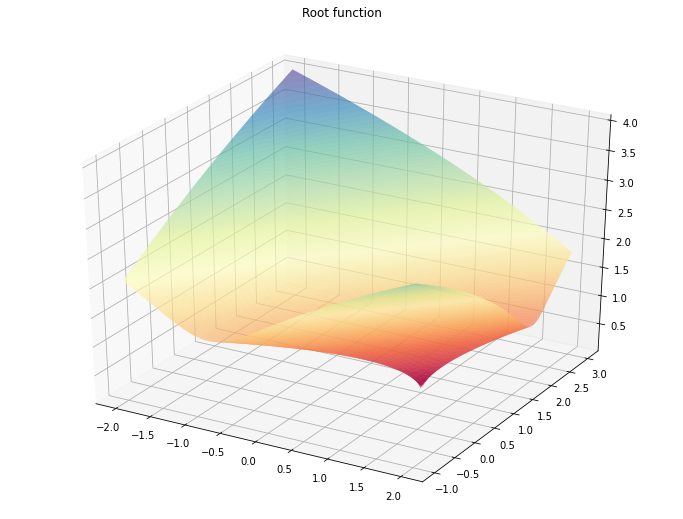

In [103]:
plot_3d_graph(x, y, f, "Root function")

## **Безумовна оптимізація**

Функція алгоритму методу випадкового пошуку зі зменшенням інтервалу.

Метод має такі параметри:

1) $Q$  -  кількість серій.

2) $P$  -  кількість точок в кожній серії.

3) $x_0$ -  перший розв'язок (початковий розв'язок).

4) $z^0$ -  розмір інтервалу.

5) $dl$ -  межі для випадквого вектора.

6) $\epsilon$ - коефіцієнт масштабування.

In [8]:
def global_random_search_decrease_step(x0, Q = 100, P = 200, z0 = 5, dl = (-1/2, 1/2), eps = 0.05):
    f_calls = 0
    history = [x0]

    while Q > 0:
        # Generate random vectors
        r_vector = np.random.uniform(*dl, size = (P, 2))
        xs = x0 + z0 * r_vector

        # Check new function values smaller than previous
        zs = [f(*point) for point in xs]
        x0 = xs[np.argmin(zs)] if f(*x0) >= np.min(zs) else x0
        z0 = (1 - eps) * z0
        
        # Add to path data
        history.append(x0)

        # Changing params after step
        Q -= 1
        p = int((1 - eps) * P)
        f_calls += len(xs) + 1

    return history, f_calls

Функція для пошуку оптимальних параметрів (кількість серій, кількість точок в кожній серії, розмір інтервалу, коефіцієнт масштабування).

In [9]:
# for finding optimal parameters
def simulate_search(x0, dict_param, params, n_sim = 70, f_s = 0, x_s = np.array([1, 1])):
    k, v_list = list(dict_param.items())[0]
    f_list = []
    x_len_list = []
    x_avg_list = []
    f_calls_list = []
    
    for elem in v_list:        
        f_opt = 0
        x_len = 0
        x_avg = []
        avg_f_calls = 0
        params[k] = elem

        for idx in range(n_sim):
            x0 = np.array([4, 3])
            history, f_calls = global_random_search_decrease_step(x0, **params)

            x_solution = history[-1]
            f_solution = f(*x_solution)

            f_opt += f_solution - f_s
            x_len += np.linalg.norm(x_solution - x_s)
            x_avg.append(x_solution)
            avg_f_calls += f_calls

        f_list.append(f_opt / n_sim)
        x_len_list.append(x_len / n_sim)
        x_avg_list.append(np.mean(x_avg, axis = 0))
        f_calls_list.append(avg_f_calls / n_sim)
        
    dict_result = {
        k: v_list,
        "Function Minimum": f_list,
        "Minima Point": x_avg_list,
        "Distance to Minima": x_len_list,
        "Function Calls": f_calls_list
    }
    return pd.DataFrame(dict_result, columns = list(dict_result.keys()))

**Підбір оптимальних параметрів для кореневої функції.**

Оптимальні параметри для кореневої функції будемо обирати на основі значення функції, відстані знайденої точки від реального мінімального значення та кількості викликів функції, що потрібна для того, щоб знайти мінімум. 

Точка мінімума кореневої функції - $(1, 1)$. Значення функції в цій точці дорівнює $0$.

Для оцінки результатів, будемо брати середнє з $70$ симуляцій.

**1) Кількість серій**

In [10]:
dict_param = {"Q": [1 if i == 0 else i * 10 for i in range(0, 21)]}
params = {"P": 50, "z0": 7, "eps": 1 / 4}
result_df = simulate_search(np.array([4, 3]), dict_param, params = params)
result_df

,Q,Function Minimum,Minima Point,Distance to Minima,Function Calls
0,1,9.500041e-01,"[1.3095110991629297, 1.274360066466902]",7.154310e-01,51.0
1,10,1.938135e-01,"[1.0015392448368217, 1.0022263665660125]",3.858666e-02,510.0
2,20,4.825262e-02,"[0.9996150194648971, 0.9997235450362268]",2.333662e-03,1020.0
3,30,1.157093e-02,"[1.0000057343830506, 1.0000100355411203]",1.342246e-04,1530.0
4,40,2.597655e-03,"[1.0000013468132751, 1.000000630224257]",6.526832e-06,2040.0
5,50,6.081649e-04,"[1.0000000059528196, 0.9999999773542128]",3.726590e-07,2550.0
6,60,1.464823e-04,"[1.0000000052293678, 1.0000000060157919]",2.161892e-08,3060.0
7,70,3.681372e-05,"[1.000000000032078, 1.000000000075074]",1.263704e-09,3570.0
8,80,8.282925e-06,"[1.0000000000020688, 1.0000000000048759]",7.578035e-11,4080.0
9,90,1.972416e-06,"[1.0000000000002387, 1.0000000000003215]",3.975452e-12,4590.0


Із таблиці видно, що функція знаходиться в точці мінімума, коли обрана кільість серій $Q=130$. Але кількість викликів функції в цьому випадку сягає $6630$, що значно впливає на швидкість роботи програми. Тому, якщо основим завданням є досягнення високої точності, то варто обирати $Q=130$. Якщо пріоритетим завданням є зменшення ресурсозатратності, то альтернативним варіантом може бути $Q=80$. В цьому випадку кількість викликів функції становить $4080$.

**2) Кількість точок в кожній серії**

In [16]:
dict_param = {"P": [5 if i == 0 else i * 10 for i in range(0, 16)]}
params = {"Q": 130, "z0": 7, "eps": 1 / 4}
result_df = simulate_search(np.array([4, 3]), dict_param, params = params)
result_df

,P,Function Minimum,Minima Point,Distance to Minima,Function Calls
0,5,3.342198e-01,"[1.238186179596192, 1.250099549576189]",4.121718e-01,780.0
1,10,1.011969e-02,"[0.9989845863019255, 0.9989490293462555]",3.389706e-03,1430.0
2,20,2.107342e-10,"[1.0, 1.0]",3.140185e-18,2730.0
3,30,0.000000e+00,"[1.0, 1.0]",0.000000e+00,4030.0
4,40,0.000000e+00,"[1.0, 1.0]",0.000000e+00,5330.0
5,50,0.000000e+00,"[1.0, 1.0]",0.000000e+00,6630.0
6,60,0.000000e+00,"[1.0, 1.0]",0.000000e+00,7930.0
7,70,0.000000e+00,"[1.0, 1.0]",0.000000e+00,9230.0
8,80,0.000000e+00,"[1.0, 1.0]",0.000000e+00,10530.0
9,90,0.000000e+00,"[1.0, 1.0]",0.000000e+00,11830.0


Як бачимо, для високої точності значення для кількості точок в кожній серії варто обирати $P=30$. В цьому випадку кількість викликів функції становить $4030$. Якщо це значення критично впливає на швидкість роботи, то можна обрати $P=20$. Кількість викликів функції - $2730$.

**3) Розмір інтервалу**

In [17]:
dict_param = {"z0": [i for i in range(1, 20)]}
params = {"Q": 130, "P": 30, "eps": 1 / 4}
result_df = simulate_search(np.array([4, 3]), dict_param, params = params)
result_df

,z0,Function Minimum,Minima Point,Distance to Minima,Function Calls
0,1,1.191911e+00,"[2.402571350397465, 2.476643257068508]",2.036618e+00,4030.0
1,2,2.554186e-01,"[1.119710065090338, 1.1259602196877743]",1.737742e-01,4030.0
2,3,0.000000e+00,"[1.0, 1.0]",0.000000e+00,4030.0
3,4,0.000000e+00,"[1.0, 1.0]",0.000000e+00,4030.0
4,5,0.000000e+00,"[1.0, 1.0]",0.000000e+00,4030.0
5,6,0.000000e+00,"[1.0, 1.0]",0.000000e+00,4030.0
6,7,0.000000e+00,"[1.0, 1.0]",0.000000e+00,4030.0
7,8,0.000000e+00,"[1.0, 1.0]",0.000000e+00,4030.0
8,9,2.980232e-10,"[1.0, 1.0]",6.280370e-18,4030.0
9,10,4.214685e-10,"[1.0, 1.0]",6.280370e-18,4030.0


Кількість викликів функції всюди однакова, тому оптимальним розміром інтервалу будемо вважати $z^0=3$.

**4) Коефіцієнт масштабування**

In [18]:
dict_param = {"eps": [0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]}
params = {"Q": 130, "P": 30, "z0": 3}
result_df = simulate_search(np.array([4, 3]), dict_param, params = params)
result_df

,eps,Function Minimum,Minima Point,Distance to Minima,Function Calls
0,0.005,0.163102,"[1.0059628457272403, 1.0061560243737953]",2.782803e-02,4030.0
1,0.010,0.120840,"[0.997806713240175, 0.9966353032451155]",1.582131e-02,4030.0
2,0.050,0.013234,"[1.0000008006441161, 1.0000154264576593]",1.625104e-04,4030.0
3,0.100,0.000490,"[0.9999999824200607, 0.9999999908313129]",2.367299e-07,4030.0
4,0.250,0.000000,"[1.0, 1.0]",0.000000e+00,4030.0
5,0.500,0.863220,"[1.7619718374708406, 1.801529080610717]",1.105965e+00,4030.0
6,0.750,1.196559,"[2.424813576717173, 2.482107490659958]",2.056172e+00,4030.0
7,0.900,1.305040,"[2.6707384664464415, 2.7161890457833264]",2.396429e+00,4030.0


В якості опитмального значення коефіцієнта масштабування для кореневої функції оберемо $\epsilon=0.25$

Візуалізація роботи методу випадквого пошуку для параметрів, які дають високу точність результату: $Q=130$, $P=30$, $z^0=3$, $\epsilon=0.25$

Result: [1. 1.]
f(x, y) = 0.0
Function calls: 4030


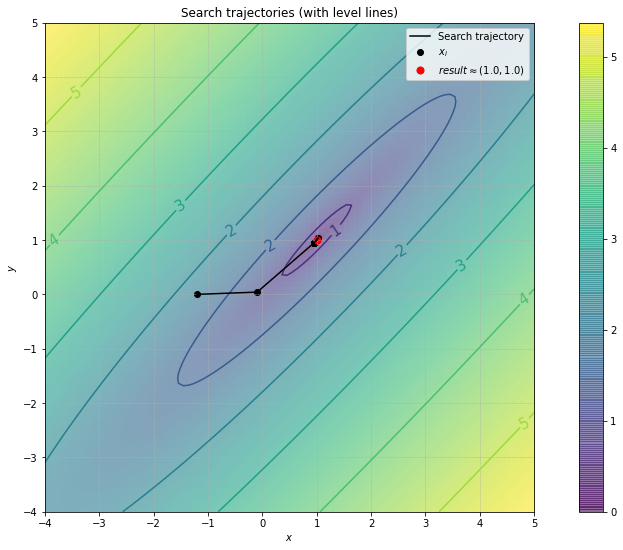

In [112]:
x0 = np.array([-1.2, 0])
history, f_calls = global_random_search_decrease_step(x0, Q = 130, P = 30, z0 = 3, eps = 0.25)
print(f"Result: {history[-1]}")
print(f"f(x, y) = {f(*history[-1])}")
print(f"Function calls: {f_calls}")
plot_trajectory(history, f, x_lims = (-4, 5) , y_lims = (-4, 5))

Візуалізація роботи методу випадквого пошуку для параметрів, які зменшують ресурсозатратність: $Q=80$, $P=20$, $z^0=3$, $\epsilon=0.25$

Result: [1. 1.]
f(x, y) = 8.449526608522371e-06
Function calls: 1680


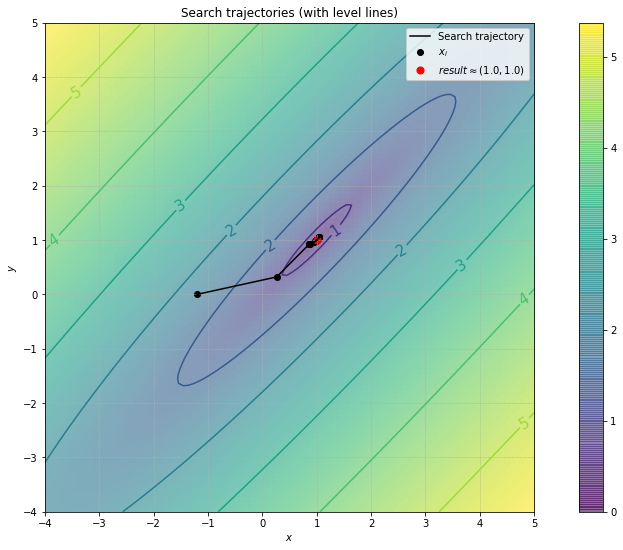

In [113]:
x0 = np.array([-1.2, 0])
history, f_calls = global_random_search_decrease_step(x0, Q = 80, P = 20, z0 = 3, eps = 0.25)
print(f"Result: {history[-1]}")
print(f"f(x, y) = {f(*history[-1])}")
print(f"Function calls: {f_calls}")
plot_trajectory(history, f, x_lims = (-4, 5) , y_lims = (-4, 5))

## **Умовна оптимізація**

Умовна оптимізація буде проводитися для кореневої функції $f(x, y) = (10(x-y)^2 + (x-1)^2)^\frac{1}{4}$.

Початкова точка $x_0=(-1.2, 0)$.

Функція для побудови траєкторії руху пошука мінімума для умовної оптимізації.

In [116]:
def limitation_plot_trajectory(history, f, x_lims = (-2, 2) , y_lims = (-1, 3), cmap = "viridis", limitations_type = "convex", in_out = "in"):
    x = [xc for xc, _ in history]
    y = [yc for _, yc in history]
    
    fig, ax = plt.subplots(figsize = (16, 9))
    
    ax.plot(x, y, color = "black", label = r"Search trajectory")
    ax.scatter(x, y, color = "black", label = r"$x_i$")
    ax.scatter(x[-1], y[-1], color = "red", label = r"$result \approx" + f"({round(x[-1], 3)}, {round(y[-1], 3)})" + r"$", s = 50)

    xx, yy = np.linspace(*x_lims, 100), np.linspace(*y_lims, 100)
    X, Y = np.meshgrid(xx, yy)
    Z = f(X, Y)
    contours = ax.contour(X, Y, Z)
    ax.clabel(contours, inline=True, fontsize=15, fmt = lambda x: f"{x:.0f}")
    c = ax.imshow(Z, extent=[x_lims[0], x_lims[1], y_lims[0], y_lims[1]], origin='lower',
            cmap=cmap, alpha=0.6)
    fig.colorbar(c, orientation='vertical', cmap=cmap)

    ax.set(xlabel = r"$x$", ylabel = r"$y$")
    ax.grid(linestyle = '--', linewidth = 0.5)
    ax.set_aspect('equal', 'box')
    ax.legend()

    if limitations_type == "convex":
        if in_out == "in":
            circle = plt.Circle((0.5, 1), 4.5, color='blue', alpha = 0.25)
        else:
            circle = plt.Circle((-1, 0), 1.1, color='blue', alpha = 0.25)
        ax.add_patch(circle)
    elif limitations_type == "linear":
        ax.fill_between(xx, region_linear_fill(xx), y2 = [y_lims[0] for _ in range(len(xx))], color='b', alpha=0.3)
    elif limitations_type == "non-convex":
        ax.add_artist(Wedge((0, 0), 3, 0, 360, width = 2, color = "blue", alpha = 0.25))

    ax.set_title(r"Search trajectories (with level lines)")
    plt.xlim(*x_lims)
    plt.ylim(*y_lims)

    plt.show()

In [22]:
calc_step_x = lambda xk, lam_k, sk: xk + lam_k * sk
calc_step_lam = lambda lam_k, delta_lam, k: lam_k + delta_lam * np.power(2, k)
calc_step_delta_lam = lambda x_vec, s_vec: 0.1 * np.linalg.norm(x_vec) / np.linalg.norm(s_vec)

Функція для методу Свена.

In [23]:
def sven_method(lam, func, x, s_direction):
    l_history = [lam]
    step_idx = 0
    bool_next = True
    delta_step = calc_step_delta_lam(x, s_direction)

    # Choosing direction
    f_start = func(*x)
    func_history = [f_start]

    x_left = calc_step_x(x, (lam - delta_step), s_direction)
    x_right = calc_step_x(x, (lam + delta_step), s_direction)
    f_l = func(*x_left)
    f_r = func(*x_right)
    if f_start > f_l and f_r > f_l:
        delta_step = -delta_step

    x_prev = calc_step_x(x, lam, s_direction)
    f_prev = func(*x_prev)
    while bool_next:
        lam = calc_step_lam(lam, delta_step, step_idx)
        x_stepped = calc_step_x(x, lam, s_direction)
        f_stepped = func(*x_stepped)

        if f_stepped > f_prev:
            bool_next = False
        f_prev = f_stepped
        l_history.append(lam)
        func_history.append(f_stepped)

        step_idx += 1

    return l_history, delta_step, func_history

Функція для методу золотого перетина.

In [24]:
def golden_ratio_method(x, s_direction, func, eps, a, b):
    results_history = [a]
    golden_r = (1 + 5 ** 0.5) / 2
    center_l, b_start = 0, b

    while True:
        golden_tmp = (b - a) / golden_r
        l1 = b - golden_tmp
        l2 = a + golden_tmp

        x1 = calc_step_x(x, l1, s_direction)
        x2 = calc_step_x(x, l2, s_direction)

        f1 = func(*x1)
        f2 = func(*x2)

        if f1 > f2:
            a = l1
            results_history.append(l1)
        else:
            b = l2
            results_history.append(l2)

        if abs(b - a) < eps:
            center_l = (b + a) / 2
            results_history.extend([center_l, b_start])
            break

    return center_l, results_history

Функція алгоритму для методу випадковго пошуку зі зменшенням інтервалу для використання лінійних обмежень.

In [26]:
def limited_random_search_decrease_step(x0, f, limitations, Q = 15, P = 100, z0 = 5, dl = (-1/2, 1/2), eps = 1/4, lim_type = "non-linear", mop = "golden",
                                        lam = 0):

    f_calls = 0
    history = [x0]

    while Q > 0:
        # Generate random vectors
        r_vector = np.random.uniform(*dl, size = (P, 2))
        xs = x0 + z0 * r_vector
        xs = [e for e in xs if limitations(*e)]
        zs = [f(*point) for point in xs]

        # Check new function values smaller than previous
        if xs:
            zs = [f(*point) for point in xs]
            x0 = xs[np.argmin(zs)] if f(*x0) >= np.min(zs) else x0
        z0 = (1 - eps) * z0
        
        # Add to path data
        history.append(x0)

        # Changing params after step
        Q -= 1
        p = int((1 - eps) * P)
        f_calls += len(zs) + 1
    
    if lim_type == "linear":
        l_history, delta_step, func_history = sven_method(lam, f, x0, np.array([1, 0]))
        uncertainty_interval_h = l_history[0:2]
        a, b = uncertainty_interval_h
        if mop == "golden":
            center_l, search_history = golden_ratio_method(x0, np.array([0, 1]), f, 0.01, a, b)

            x_ = calc_step_x(x0, center_l, np.array([1, 0]))
            history.append(np.array(x_))
        else:
            center_l, search_history = dsk_method(x0, np.array([0, 1]), f, 0.01, a, b)

            x_ = calc_step_x(x0, center_l, np.array([1, 0]))
            history.append(np.array(x_))

    return history, f_calls

### **Демонстрація роботи алгоритму в опулкій області (всередині та поза нею).**

Розглянемо випадок, коли область опулка і точка мінімума знаходиться всередині цієї області.

Result: [1. 1.]
f(x, y) = 0.0
Function calls: 4030


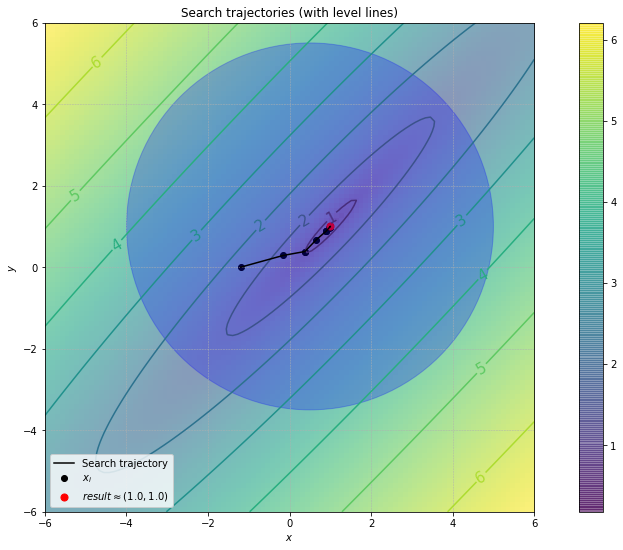

In [117]:
x0 = np.array([-1.2, 0])
history, f_calls = limited_random_search_decrease_step(x0, f, limitation_in_bool, Q = 130, P = 30, z0 = 3, dl = (-1/2, 1/2), eps = 0.25)
print(f"Result: {history[-1]}")
print(f"f(x, y) = {f(*history[-1])}")
print(f"Function calls: {f_calls}")
limitation_plot_trajectory(history, f, x_lims = (-6, 6) , y_lims = (-6, 6), limitations_type = "convex", in_out = "in")

Розглянемо випадок, коли область опулка і точка мінімума знаходиться поза цією області.

Result: [0.09645164 0.08828255]
f(x, y) = 0.9507458000647399
Function calls: 2154


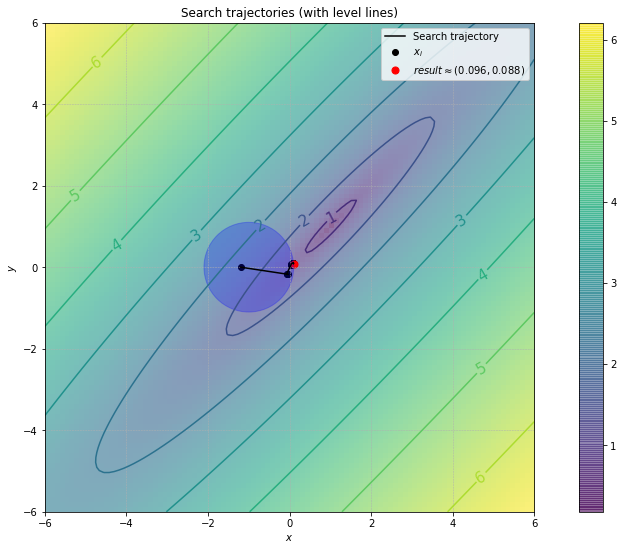

In [118]:
x0 = np.array([-1.2, 0])
history, f_calls = limited_random_search_decrease_step(x0, f, limitation_out_bool, Q = 130, P = 30, z0 = 3, dl = (-1/2, 1/2), eps = 0.25)
print(f"Result: {history[-1]}")
print(f"f(x, y) = {f(*history[-1])}")
print(f"Function calls: {f_calls}")
limitation_plot_trajectory(history, f, x_lims = (-6, 6) , y_lims = (-6, 6), limitations_type = "convex", in_out = "out")

### **Демонстрація роботи алгоритму у неопуклій та лінійній областях.**

Розглянемо область, яка є неопуклою. В такому випадку дуже часто трапляється так, що точка мінімума не досягається. 

Result: [-0.57166588 -0.74987055]
f(x, y) = 1.292146078239876
Function calls: 2120


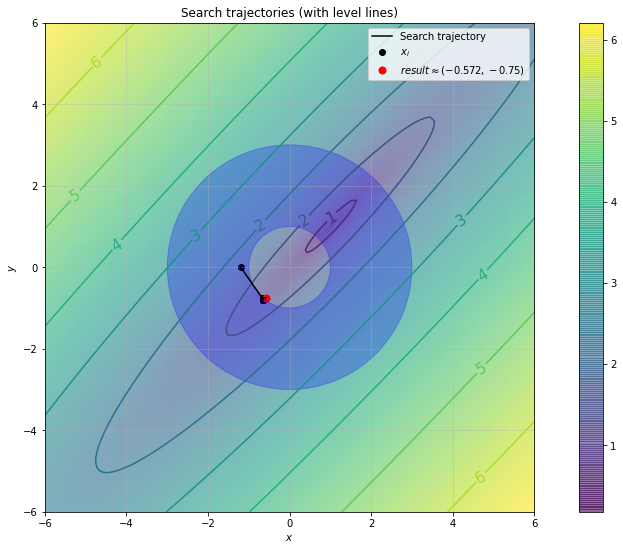

In [119]:
x0 = np.array([-1.2, 0])
history, f_calls = limited_random_search_decrease_step(x0, f, region_non_convex_bool, Q = 130, P = 30, z0 = 3, dl = (-1/2, 1/2), eps = 0.25, lim_type = 'linear')
print(f"Result: {history[-1]}")
print(f"f(x, y) = {f(*history[-1])}")
print(f"Function calls: {f_calls}")
limitation_plot_trajectory(history, f, x_lims = (-6, 6) , y_lims = (-6, 6), limitations_type = "non-convex")

Розглянемо випадок, коли область є лінійною. Щоб вийти на межу області потрібно використовувати методи одновимірного пошуку. В умовах цієї задачі розглянемо метод золотого перетину. 

Result: [1.00394057 1.        ]
f(x, y) = 0.11432145721709482
Function calls: 2827


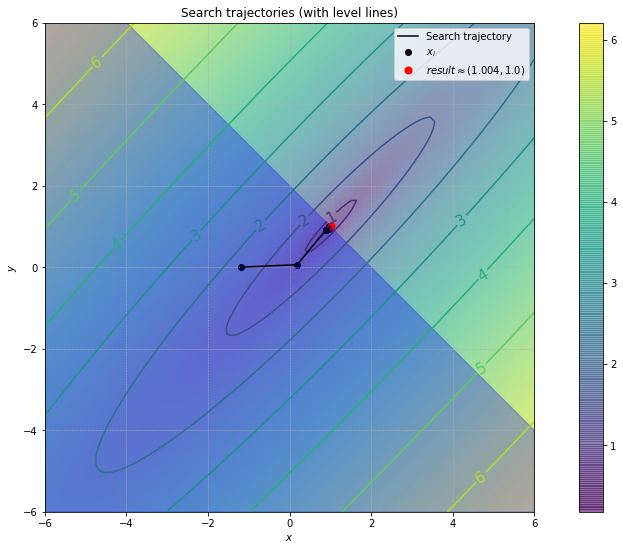

In [120]:
x0 = np.array([-1.2, 0])
history, f_calls = limited_random_search_decrease_step(x0, f, region_linear_bool, Q = 130, P = 30, z0 = 3, dl = (-1/2, 1/2), eps = 0.25, lim_type = "linear")
print(f"Result: {history[-1]}")
print(f"f(x, y) = {f(*history[-1])}")
print(f"Function calls: {f_calls}")
limitation_plot_trajectory(history, f, x_lims = (-6, 6) , y_lims = (-6, 6), limitations_type = "linear")

## **Висновки**

В ході цієї роботи було досліджено роботу методу випадкового пошуку зі зменшенням інтервалу для кореневої функції.
Відбувся підбір оптимальних значень для параметрів алгоритму, а саме:
*   щоб досягти високої точності варто використати такий набір параметрів - $Q=130, P=30, z^0=3, \epsilon=0.25$;
*   щоб знизити велику ресурсозатратність варто використати такий набір параметрів -
$Q=80, P=20, z^0=3, \epsilon=0.25$.

Також було розглянуто метод випадкового пошуку в якості метода спуску для умовної оптимізації. Основий принцип, на якому базуються методи спуску, - зменшення значення цільової функції. 

Умовна оптимізація була розглянута для опуклої, неопуклої та лінійної областей.

У випадку неопуклої області було встановлено, що метод випадкового пошуку не досягає свого мінімума.

Для лінійної області було використано метод золотого перетину, який вивів функцію на границю області.

Крім цього, для опуклої області було розглянуто випадки, коли оптимальна точка знаходиться всередині області та поза нею. Коли мінімум функції лежить не в області, то алгоритм не може вийти за її межі, а тому працює в сторону зменшення функції, поки не досягне границі.



## **Список літератури**

1. Химмельблау Д.М. Прикладное нелинейное программирование. (Applied Nonlinear Programming, 1972).
2. Реклейтис Г., Рейвиндран А., Рэгсдел К. Оптимизация в технике.
3. https://github.com/pKononenko/coursework_optimisation_methods_km81/blob/main/coursework_kononenko_km81%20(1).ipynb